<a href="https://colab.research.google.com/github/GalaxyHunters/VIVID3D/blob/docs%2Fexamples/docs/source/notebooks/GalaxyStarsEnzo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spiral Galaxy (Enzo)

## *Prerequisites* (Run Once)

In [1]:
%%capture
#@title Installing Libraries
#!pip install vivid3d
!pip install yt

In [2]:
#@title Loading Data with YT
import yt
import numpy as np

ds = yt.load_sample("IsolatedGalaxy")                # Load example data from yt
sphere = ds.sphere(center="c", radius=(17, "kpc")) # Create sphere object
ds.print_stats()

/usr/local/lib/python3.7/dist-packages/yt/sample_data/api.py:145: UserWarning: Storage directory from yt config doesn't exist (currently set to '/does/not/exist'). Current working directory will be used instead.
  "Storage directory from yt config doesn't exist "
yt : [INFO     ] 2022-11-02 23:57:54,213 'IsolatedGalaxy' is not available locally. Looking up online.
yt : [INFO     ] 2022-11-02 23:57:54,218 Downloading from https://yt-project.org/data/IsolatedGalaxy.tar.gz
100%|███████████████████████████████████████| 305M/305M [00:00<00:00, 84.0GB/s]
yt : [INFO     ] 2022-11-02 23:58:25,568 Untaring downloaded file to '/content'
yt : [INFO     ] 2022-11-02 23:58:31,146 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2022-11-02 23:58:31,149 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2022-11-02 23:58:31,154 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-11-02 23:58:31,165 Parameters: domain_right_edge         = 

level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	     1	         32768	            32
  1	     8	         34304	            33
  2	     8	        181888	            57
  3	     8	        646968	            87
  4	    15	        947856	            99
  5	    51	        874128	            96
  6	    18	        786328	            93
  7	    28	        446776	            77
  8	    36	        209400	            60
----------------------------------------------
   	   173	       4160416


t = 6.00002000e-03 = 1.39768066e+16 s = 4.42898275e+08 years

Smallest Cell:
	Width: 1.221e-04 Mpc Mpc
	Width: 1.221e+02 pc pc
	Width: 2.518e+07 AU AU
	Width: 3.767e+20 cm cm


## Creating Model

yt : [INFO     ] 2022-11-03 00:02:11,259 xlim = 0.491501 0.508499
yt : [INFO     ] 2022-11-03 00:02:11,268 ylim = 0.491501 0.508499
yt : [INFO     ] 2022-11-03 00:02:11,278 xlim = 0.491501 0.508499
yt : [INFO     ] 2022-11-03 00:02:11,286 ylim = 0.491501 0.508499
yt : [INFO     ] 2022-11-03 00:02:11,328 Splatting (('all', 'creation_time')) onto a 800 by 800 mesh using method 'ngp'



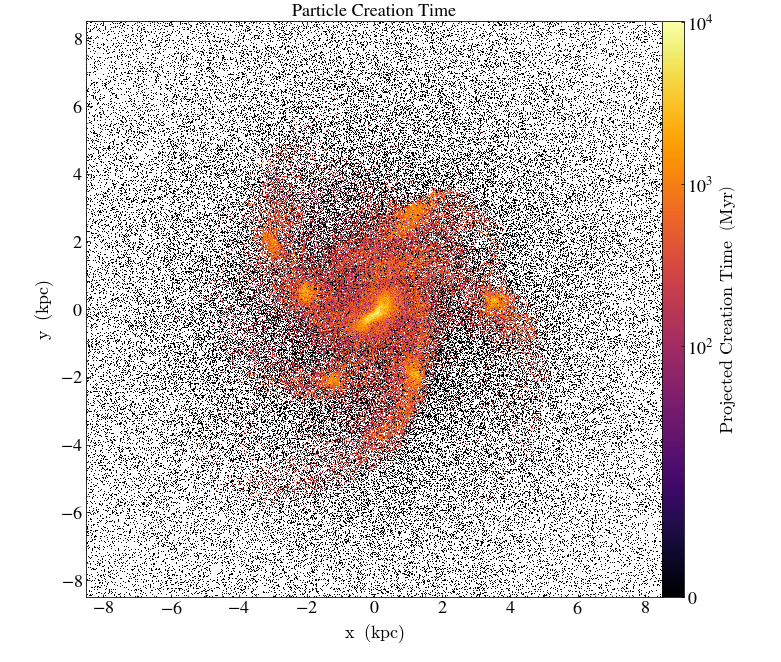

In [11]:
# Pre-vizualization of the dataset
plot = yt.ParticleProjectionPlot(ds, "z", ("all", "creation_time"), width=(17, "kpc")).set_cmap('creation_time', 'inferno')
plot.set_unit(("all", "creation_time"), "Myr")
plot.annotate_title("Particle Creation Time")

In [ ]:
creation_time = np.array(sphere[("all", "creation_time")].in_units('Myr')) 
stars_mask = creation_time > 0 # Mask for selecting only cells with stars

x = sphere[("all", "particle_position_x")].in_units('kpc') # Create list of x grid values
y = sphere[("all", "particle_position_y")].in_units('kpc') # Create list of y grid values
z = sphere[("all", "particle_position_z")].in_units('kpc') # Create list of z grid values

stars = np.array(list(zip(x, y, z)))[stars_mask]           # Transform XYZ to Point3DArray and mask by creation_time
color_field = creation_time[stars_mask]                    # Selected particles color_field
print(color_field.min(), color_field.max())       
print(len(color_field))

star_field = vivid3d.PointCloud(stars, color_field) # Create PointCloud object

In [ ]:
# Making the stars glowy!
emissive = vivid3d.Material(emissive_strength=1.0, emissive_color="white")
star_field.material = emissive
star_field.colormap = "RdBu" # Old stars are red, young stars are blue

star_field.show()